In [1]:
#importing all necessaary libraries
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay, recall_score, precision_score, f1_score, auc, precision_recall_curve, confusion_matrix
#from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set_style('darkgrid')
random_state = 42

import warnings
warnings.filterwarnings("ignore")

##  Data Collection:

### Introduction

Beginning in 1990, the Taiwanese government allowed the formation of new banks. These new banks initially did business with real estate companies, but when the market became saturated they turned to the credit card business. In order to increase market share, these banks over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts. Default occurs when a credit card holder is unable to meet the legal obligation of repayment. The crisis caused the blow to consumer finance confidence and it has been a big challenge for both banks and cardholders.

In a well-developed financial system, crisis management is on the downstream and risk prediction is on the upstream. The major purpose of risk prediction is to use financial information, such as business financial statement, customer transaction and repayment records, etc., to predict business performance or individual customers’ credit risk and to reduce the damage and uncertainty.

In this project, our job is to reliably predict who is likely to default. If so, the bank may be able to prevent the loss by providing the customer with alternative options (such as forbearance or debt consolidation, etc.). Hence, we build an automated model based on the information about the client and historical transactions, capable of identifying key factors and predicting a credit card default.

### Dataset Description
Our study is conducted on the Default of credit card clients dataset from the UCI machine learning repository [2]. It gathers 
 observations made by a bank in Taiwan on distinct credit card holders from April 2005 to September 2005. The dataset employs the binary variable default.payment.next.month as response variable. It indicates whether or not the credit card holders are defaulters next month (
). Then, the following 23 variables are used as explanatory variables. We report the official description from [2].

Client personal information:
LIMIT_BAL: Amount of given credit (in New Taiwan dollars): it includes both the individual consumer credit and his/her family (supplementary) credit.
SEX: 1 = male; 2 = female.
EDUCATION: 1 = graduate school; 2 = university; 3 = high school; 4 = others.
MARRIAGE: Marital status, 1 = married; 2 = single; 3 = others.
AGE: Age in years.
History of past payments from April to September 2005, i.e., the delay of the past payment referred to a specific month: 6. PAY_1: Repayment status in September, 2005. 7. PAY_2: Repayment status in August, 2005. 8. PAY_3: Repayment status in July, 2005. 9. PAY_4: Repayment status in June, 2005. 10. PAY_5: Repayment status in May, 2005. 11. PAY_6: Repayment status in April, 2005.
The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; ...; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

Amount of bill statement (in New Taiwan dollars), i.e. a monthly report that credit card companies issue to credit card holders in a specific month: 12. BILL_AMT1: Amount of bill statement in September, 2005. 13. BILL_AMT2: Amount of bill statement in August, 2005. 14. BILL_AMT3: Amount of bill statement in July, 2005. 15. BILL_AMT4: Amount of bill statement in June, 2005. 16. BILL_AMT5: Amount of bill statement in May, 2005. 17. BILL_AMT6: Amount of bill statement in April, 2005.
Amount of previous payment (in New Taiwan dollars): 18. PAY_AMT1: Amount of previous payment in September, 2005. 19. PAY_AMT2: Amount of previous payment in August, 2005. 20. PAY_AMT3: Amount of previous payment in July, 2005. 21. PAY_AMT4: Amount of previous payment in June, 2005. 22. PAY_AMT5: Amount of previous payment in May, 2005. 23. PAY_AMT6: Amount of previous payment in April, 2005.
In order to understand what the data looks like, we print some observations in the table below. The target default.payment.next.month is renamed DEFAULT to be short, while the PAY_0 column is renamed PAY_1.

In [2]:
# Importing the data
df = pd.read_excel('default of credit card clients.xls')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


## Data Preprocessing:

In [3]:
# Assuming the first row is not already the header, you can set it explicitly
df.columns = df.iloc[0]  # Use the first row as column names
df = df[1:]  # Skip the first row since it's now the header


In [4]:
# reseting the index
df = df.reset_index(drop=True)


In [5]:
# Renaming the columns 
df.rename(columns={'default payment next month':'DEFAULT'}, inplace=True)
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
df.rename(columns=lambda x: x.upper(), inplace=True)

In [6]:
#top 5 instances
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Data Cleaning

In [7]:
# deleting the ID column
df.drop('ID', axis=1, inplace =True)

In [8]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [9]:
# getting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  object
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  object
 4   AGE        30000 non-null  object
 5   PAY_1      30000 non-null  object
 6   PAY_2      30000 non-null  object
 7   PAY_3      30000 non-null  object
 8   PAY_4      30000 non-null  object
 9   PAY_5      30000 non-null  object
 10  PAY_6      30000 non-null  object
 11  BILL_AMT1  30000 non-null  object
 12  BILL_AMT2  30000 non-null  object
 13  BILL_AMT3  30000 non-null  object
 14  BILL_AMT4  30000 non-null  object
 15  BILL_AMT5  30000 non-null  object
 16  BILL_AMT6  30000 non-null  object
 17  PAY_AMT1   30000 non-null  object
 18  PAY_AMT2   30000 non-null  object
 19  PAY_AMT3   30000 non-null  object
 20  PAY_AMT4   30000 non-null  o

In [10]:
# changing the datatype from object to integer
numeric_columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT']

# Convert numeric columns to numeric type (float or int)
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [12]:
# checking the null values
df.isnull().sum()

0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [13]:
# counts of unique values in the 'SEX' column
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [14]:
# counts of unique values in the 'EDUCATION' column
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [15]:
df1 = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[df1, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [16]:
#occurrences of each unique value in the 'MARRIAGE' column
df['MARRIAGE'].value_counts().sort_index()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64

In [17]:
df2 = df['MARRIAGE'] == 0
df.loc[df2, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [18]:
#occurrences of each unique value in the 'DEFAULT' column
df['DEFAULT'].value_counts()

DEFAULT
0    23364
1     6636
Name: count, dtype: int64

### History of Past Payments

In [19]:
#Below we print the description of the history of past payments features.
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [20]:
df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.842267,1.557267,35.485500
std,129747.661567,0.489129,0.744494,0.521405,9.217904
min,10000.000000,1.000000,1.000000,1.000000,21.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000


### Amount of Bill Statement and Previous Payment

In [21]:
#Below we print the description of the features related to the amount of bill statement and the amount of previous payment
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [22]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


## Exploratory Data Analysis (EDA)

<Axes: xlabel='DEFAULT', ylabel='count'>

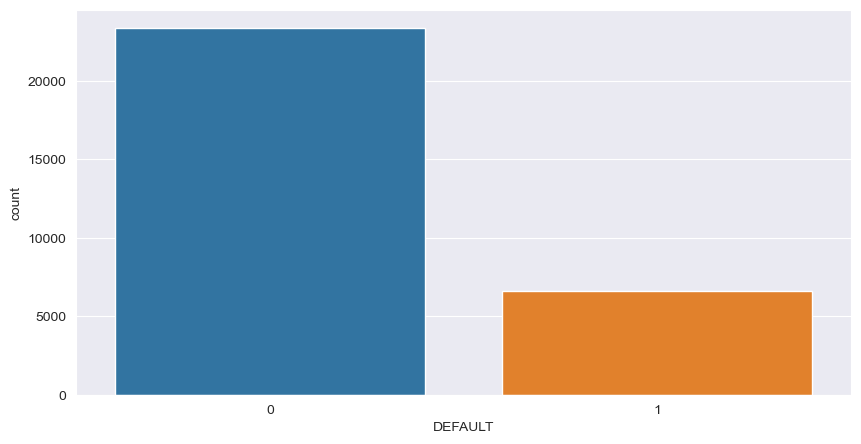

In [23]:
#counts of each unique value in the 'DEFAULT' column
plt.figure(figsize=(10,5))
sns.countplot(x = 'DEFAULT', data = df)

<Axes: xlabel='SEX', ylabel='count'>

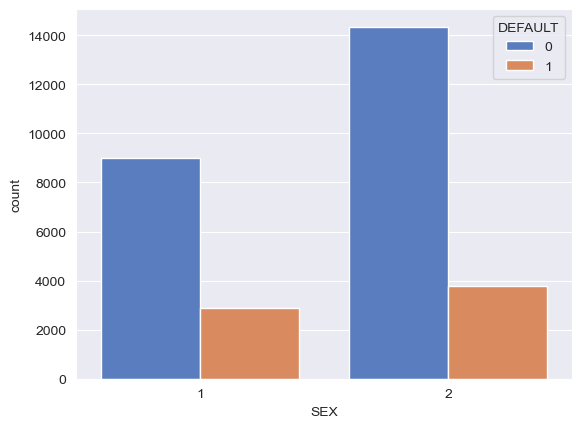

In [24]:
# Checking the number of counts of defaulters and non defaulters sexwise
sns.countplot(x='SEX', data=df,hue="DEFAULT", palette="muted")  

NonDefaults have a higher proportion of Females (Sex=2)

<Axes: xlabel='MARRIAGE', ylabel='count'>

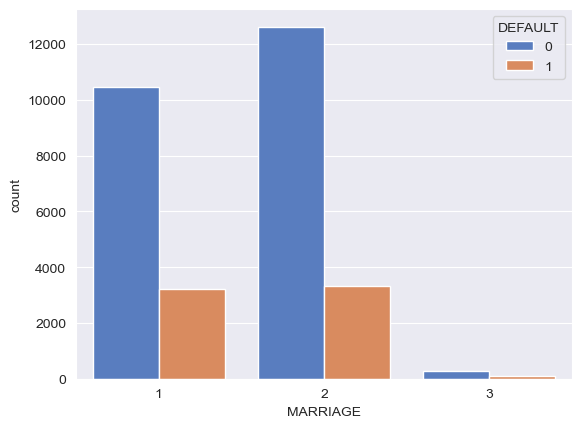

In [25]:
#count plot to visualize the distribution of 'MARRIAGE' categories
sns.countplot(x="MARRIAGE", data=df,hue="DEFAULT", palette="muted")

NonDefaults have a higher proportion of Singles (MARRIAGE=2)

<Axes: xlabel='EDUCATION', ylabel='count'>

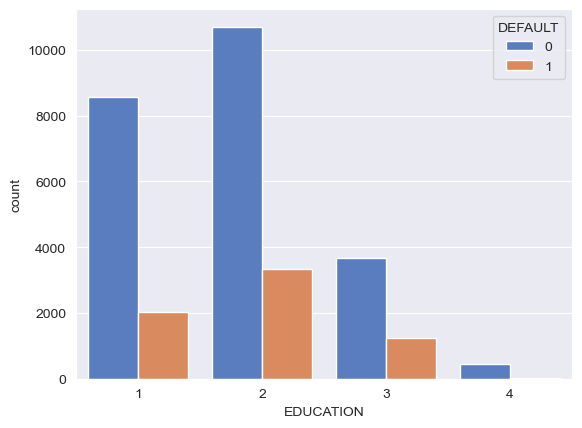

In [26]:
#count plot to visualize the distribution of 'EDUCATION' categories with respect to the 'DEFAULT' categories
sns.countplot(x="EDUCATION", data=df,hue="DEFAULT", palette="muted")

NonDefaults have a higher proportion of MoreEducated (EDUCATION - 1 & 2)

In [27]:
pd.crosstab(df['LIMIT_BAL'],df['DEFAULT'])

DEFAULT,0,1
LIMIT_BAL,,
10000,296,197
16000,2,0
20000,1278,698
30000,1042,568
40000,138,92
...,...,...
750000,4,0
760000,1,0
780000,2,0


Defaults have a higher proportion of lower LIMIT_BAL values

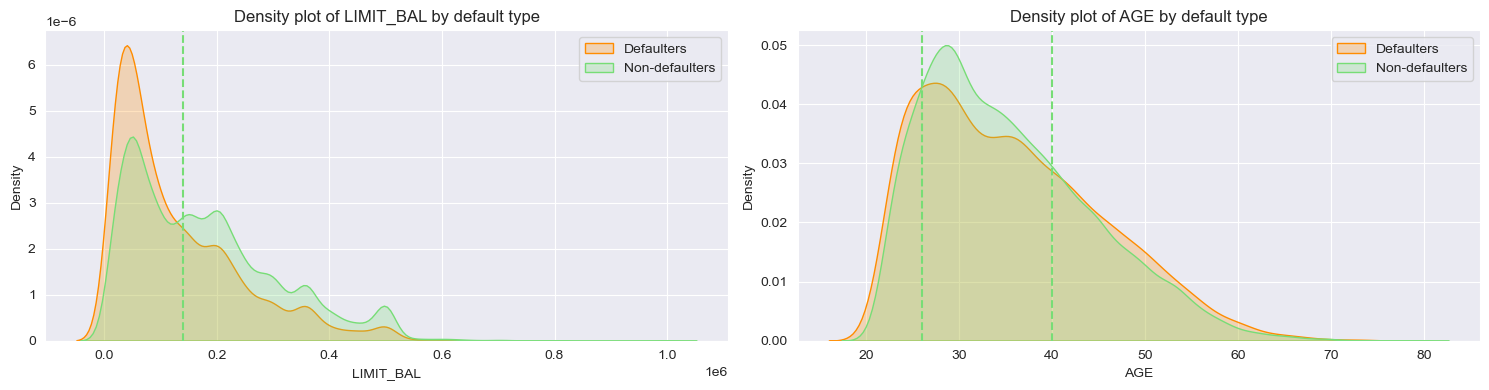

In [28]:
# Kernel density distribution oge and limit_bal
sns.set_palette(palette=['#77DD76','#FF6962'])
fig, axs = plt.subplots(1, 2, figsize=(15,4))

class_0 = df.loc[df['DEFAULT'] == 0]['LIMIT_BAL']
class_1 = df.loc[df['DEFAULT'] == 1]['LIMIT_BAL']
axs[0].set_title('Density plot of LIMIT_BAL by default type')
sns.kdeplot(class_1, fill=True, label='Defaulters', color='darkorange', ax=axs[0])
sns.kdeplot(class_0, fill=True, label='Non-defaulters', ax=axs[0])
axs[0].axvline(0.14*1e6, 0, ls='--')
axs[0].legend()

class_0 = df.loc[df['DEFAULT'] == 0]['AGE']
class_1 = df.loc[df['DEFAULT'] == 1]['AGE']
axs[1].set_title('Density plot of AGE by default type')
sns.kdeplot(class_1, fill=True, label='Defaulters', color='darkorange', ax=axs[1])
sns.kdeplot(class_0, fill=True, label='Non-defaulters', ax=axs[1])
axs[1].axvline(26, 0, ls='--')
axs[1].axvline(40, 0, ls='--')
axs[1].legend()

fig.tight_layout()
plt.show()

For the feature AGE, we perform a similar visual analysis, as shown above on the right. The probability of non-default of age between approximately 
 and 
 is higher.

<Axes: xlabel='0', ylabel='0'>

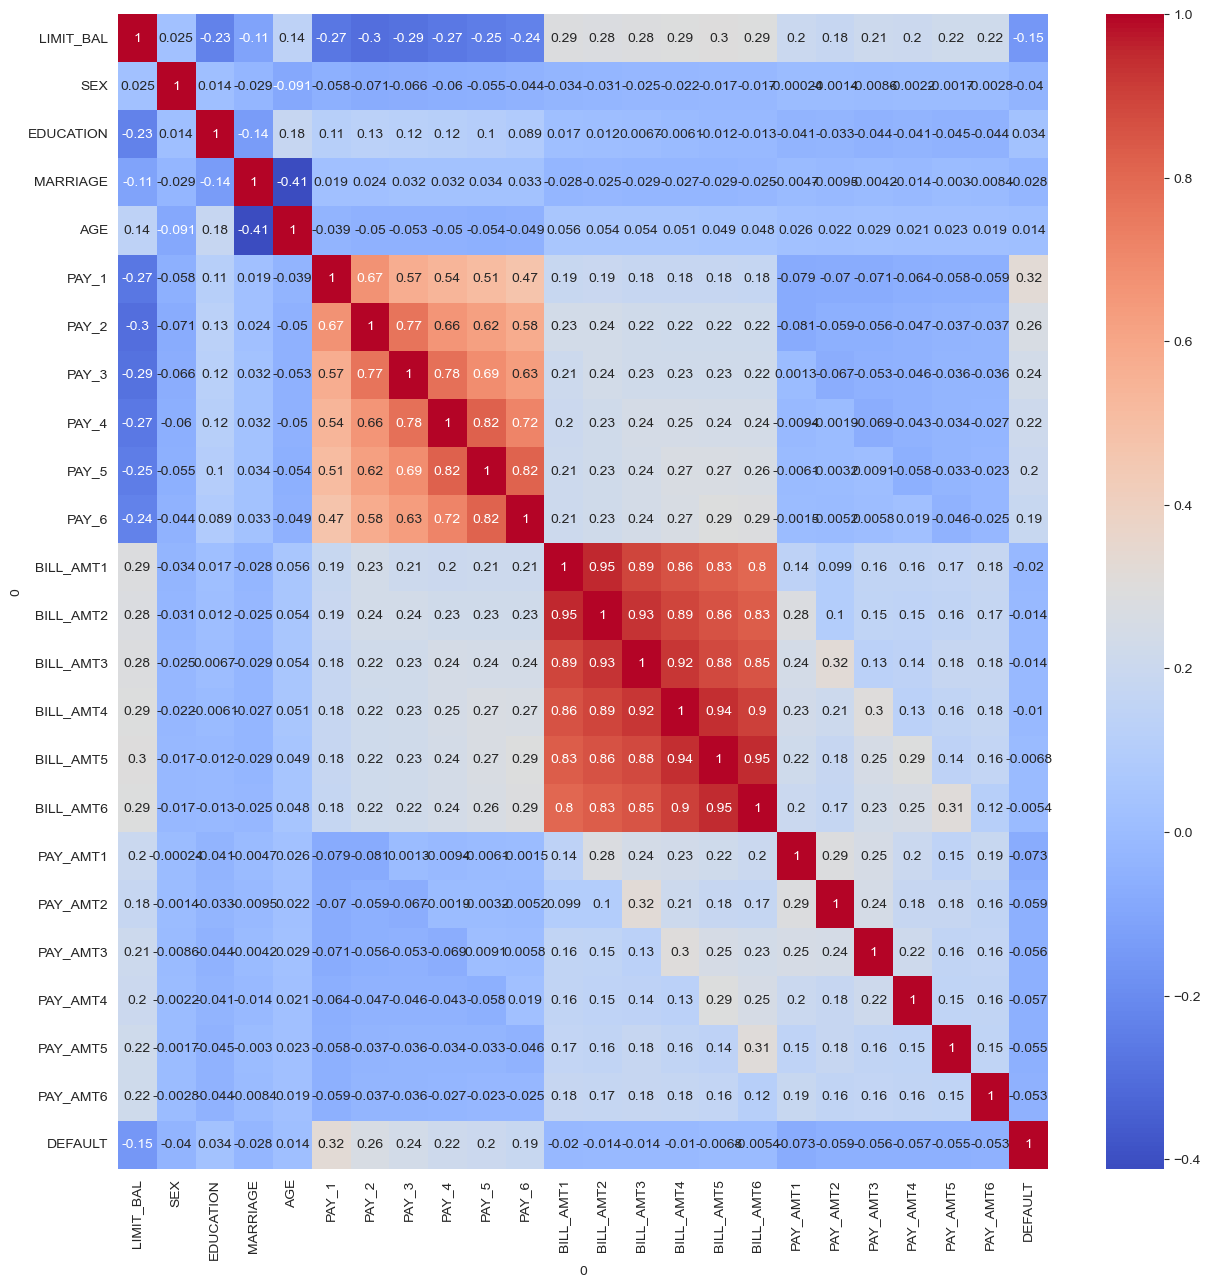

In [29]:
#Creating the figure of the heatmap to visualize the correlation matrix of the DataFrame df
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

## Feature Selection

All features included in the model are considered important for predicting credit card defaults based on comprehensive analysis. 

Each feature contributes valuable information related to credit card usage, payment behavior, and customer demographics, collectively enhancing the model's ability to predict default risk.


In [31]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [86]:
np.savez(r'C:\Users\madhu\OneDrive\Desktop\data science project\Group_8_Clean_Data', df=df.to_csv())

## Splitting the Data

In [32]:
#splitting the data 
X = df.drop('DEFAULT', axis = 1)
y = df['DEFAULT']

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 7)

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Balancing the Dataset
#smote = SMOTE(random_state=7)
#X_train, y_train = smote.fit_resample(X_train, y_train)
#Performing balancing the dataset resulted in lower accuracy for both KNN and logistic regression models

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24000, 23)
(24000,)
(6000, 23)
(6000,)


##  Model training and Selection: 

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

model_list = [
    ("lr", LogisticRegression(max_iter=1000)),
    ("dt", DecisionTreeClassifier()),
    ("rf", RandomForestClassifier()),
    ("adb", AdaBoostClassifier()),
    ("svm", SVC()),
    ("gnb", GaussianNB()),
    ("xgb", XGBClassifier()),
    ("knn", KNeighborsClassifier())
]

for model_name, model in model_list:
    model.fit(X_train, y_train)  # Fit the model to the training data
    print(f'{model_name} : {model.score(X_train, y_train)}')  # Evaluate and print the accuracy on the training set


lr : 0.8112083333333333
dt : 0.9994583333333333
rf : 0.9994583333333333
adb : 0.817875
svm : 0.825
gnb : 0.6768333333333333
xgb : 0.8887083333333333
knn : 0.841875


## Model Evaluation:

In [37]:
# executing the all models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

model_list = [("lr",LogisticRegression(max_iter=1000)),("dt",DecisionTreeClassifier()),("rf",RandomForestClassifier()),("adb",AdaBoostClassifier())
              ,("svm",SVC()),("gnb",GaussianNB()),("xgb",XGBClassifier()),("knn", KNeighborsClassifier())]

# accuracy score on test dataset for all models  
for model_name,model in model_list:
    m = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'{model_name} : {accuracy_score(y_pred,y_test)}')

lr : 0.8135
dt : 0.7275
rf : 0.8161666666666667
adb : 0.8165
svm : 0.8188333333333333
gnb : 0.6665
xgb : 0.8141666666666667
knn : 0.7925


## Hyperparameter Tuning with GridSearchcv:

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Define hyperparameter grids for both Logistic Regression and KNN
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

param_grid_knn = {
    'n_neighbors': [i for i in range(1, 51)],  # Modify the range for n_neighbors
    'weights': ['uniform', 'distance']
}

# Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)
grid_search_lr = GridSearchCV(estimator=logistic_regression, param_grid=param_grid_lr, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Access the best parameters found by GridSearchCV for Logistic Regression
best_params_lr = grid_search_lr.best_params_
print("Best parameters for Logistic Regression:", best_params_lr)

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Access the best parameters found by GridSearchCV for KNN
best_params_knn = grid_search_knn.best_params_
print("Best parameters for KNN:", best_params_knn)


Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best parameters for Logistic Regression: {'C': 100, 'penalty': 'l2'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters for KNN: {'n_neighbors': 33, 'weights': 'distance'}


## Hyperparameter Tuning with RandomSearchcv:

In [39]:
# finding out the best hyperparameters using randomizedsearchcv
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(estimator = KNeighborsClassifier(),
                  param_distributions = {"n_neighbors": range(1,51),
                                "weights": ['uniform', 'distance'],
                                'metric': ['euclidean', 'manhattan']},
                  cv=10,scoring='accuracy',n_iter=10)

rs.fit(X_train, y_train)

# Getting the best hyperparameters and model
best_params = rs.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 37, 'metric': 'euclidean'}


## Results Interpretation:

In [66]:
# accuracy score on train dataset for all models  
for model_name,model in model_list:
    print(f'{model_name} : {model.score(X_train,y_train)}')

logistic regression : 0.8111666666666667
k_nearest neighbors : 0.816


logistic regression : 0.8136666666666666
logistic regression : [[4568  976]
 [ 142  314]]
Axes(0.125,0.11;0.62x0.77)


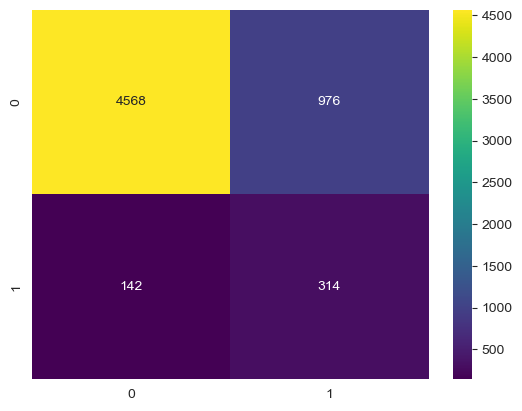

None
logistic regression :
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      5544
           1       0.24      0.69      0.36       456

    accuracy                           0.81      6000
   macro avg       0.61      0.76      0.63      6000
weighted avg       0.91      0.81      0.85      6000

k_nearest neighbors : 0.8115
k_nearest neighbors : [[4469  890]
 [ 241  400]]
Axes(0.125,0.11;0.62x0.77)


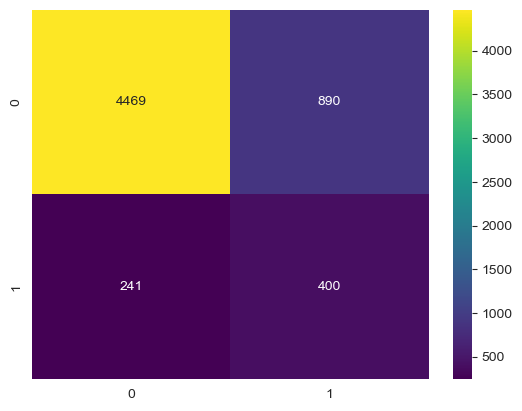

None
k_nearest neighbors :
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      5359
           1       0.31      0.62      0.41       641

    accuracy                           0.81      6000
   macro avg       0.63      0.73      0.65      6000
weighted avg       0.88      0.81      0.84      6000



In [64]:
from sklearn.metrics import classification_report

model_list = [("logistic regression", LogisticRegression(C=100, penalty='l2', max_iter=1000)), ("k_nearest neighbors", KNeighborsClassifier(weights='uniform', n_neighbors=35, metric='euclidean'))]

# Accuracy score, confusion matrix, and classification report on test dataset for all models  
for model_name, model in model_list:
    m = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_pred, y_test)
    print(f'{model_name} : {accuracy_score(y_pred, y_test)}')
    print(f'{model_name} : {confusion_matrix(y_pred, y_test)}')
    print(sns.heatmap(cm, annot=True, fmt='d', cmap='viridis'))
    print(plt.show())
    print(f'{model_name} :')
    print(classification_report(y_pred, y_test))


## Conclusion
The objective is to estimate the likelihood of a credit card holder defaulting on their payments by considering their personal attributes and past payment behavior.

Also, if we talk about the confusion matrix, it become more important to keep the False Negative(FN) as minimum as possible. because, FN indiactes the default case predicted as not-default which become criitcal as banks earn a major revenue from lending loans and no doubt, it is often associated with risk.

Each feature contributes valuable information related to credit card usage, payment behavior, and customer demographics, collectively enhancing the model's ability to predict default risk


Performing balancing the dataset resulted in lower accuracy for both KNN and logistic regression models.

After conducting a thorough analysis of the Accuracy and Recall values across all models, it has been determined that the knn and logistic regression stands out as the most optimal model for addressing this problem.